Data cleaning or cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('rusian_housing_dataset.csv')

In [56]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [57]:
print(df.shape)

(7662, 291)


In [58]:
print(df.dtypes)

id                      int64
timestamp              object
full_sq               float64
life_sq               float64
floor                   int64
                       ...   
church_count_5000       int64
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
Length: 291, dtype: object


In [59]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,7662.000000,7662.000000,6486.000000,7662.000000,7662.000000,7662.000000,6613.000000,7662.000000,7662.000000,6968.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,34304.500000,53.701164,32.660037,7.652571,12.591099,1.854216,1820.888099,1.876403,6.938662,1.985792,...,69.532890,35.777865,12.152310,2.007439,16.749152,33.109371,0.412425,9.639650,56.235839,6.330723
std,2211.973214,20.104320,22.737855,5.099418,6.659291,1.517171,552.993964,0.835665,25.579688,0.820086,...,129.533773,76.524992,29.590097,5.664540,30.706709,49.734993,0.608938,21.499687,47.632547,4.956223
min,30474.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32389.250000,39.200000,19.900000,4.000000,9.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,...,7.000000,2.000000,1.000000,0.000000,3.000000,10.000000,0.000000,0.000000,12.000000,2.000000
50%,34304.500000,50.410000,30.400000,7.000000,14.000000,1.000000,1982.000000,2.000000,7.000000,2.000000,...,27.000000,10.000000,2.000000,0.000000,7.000000,17.000000,0.000000,2.000000,51.000000,5.000000
75%,36219.750000,63.300000,41.800000,11.000000,17.000000,2.000000,2011.000000,2.000000,9.500000,3.000000,...,54.000000,25.000000,5.000000,1.000000,13.000000,29.000000,1.000000,7.000000,79.000000,11.000000
max,38135.000000,403.000000,869.000000,41.000000,48.000000,6.000000,2019.000000,19.000000,1968.000000,4.000000,...,643.000000,374.000000,145.000000,29.000000,150.000000,249.000000,2.000000,105.000000,212.000000,21.000000


In [60]:
# select numeric columns

df_num_columns = df.select_dtypes(include=[np.number])
num_columns = df_num_columns.columns.values
num_columns

array(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state', 'area_m',
       'raion_popul', 'green_zone_part', 'indust_part',
       'children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school',
       'school_quota', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'full_all', 'male_f', 'female_f', 'young_all',
       'young_male', 'young_female', 'work_all', 'work_male',
       'work_female', 'ekder_all', 'ekder_male', 'ekder_female',
       '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male',
       '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all',
       '16_29_male', '16_29_female', '0_13_a

In [61]:
# select non numeric columns

df_non_num_columns = df.select_dtypes(exclude=[np.number])

non_num_columns = df_non_num_columns.columns.values
non_num_columns

array(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion',
       'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line',
       'big_road1_1line', 'railroad_1line', 'ecology'], dtype=object)

In [63]:
df.isnull().count()

id                    7662
timestamp             7662
full_sq               7662
life_sq               7662
floor                 7662
                      ... 
church_count_5000     7662
mosque_count_5000     7662
leisure_count_5000    7662
sport_count_5000      7662
market_count_5000     7662
Length: 291, dtype: int64

# Missing Data

## Identify missing data using:

### Heatmap

In [65]:
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

<AxesSubplot:>

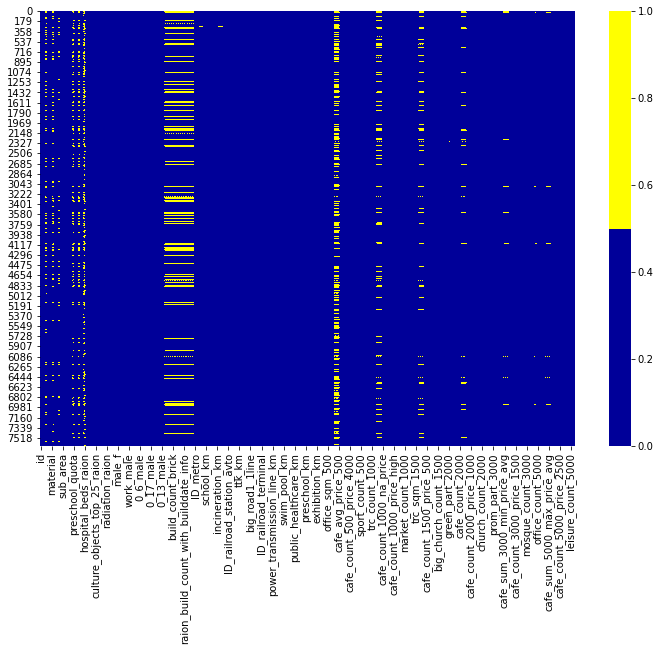

In [66]:
fig_size = plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))

### Missing Data Percentage List

In [67]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 15%
floor - 0%
max_floor - 0%
material - 0%
build_year - 14%
num_room - 0%
kitch_sq - 0%
state - 9%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 21%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 21%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 45%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0%
wor

### Missing data Histogram

created missing indicator for: life_sq
created missing indicator for: build_year
created missing indicator for: state
created missing indicator for: product_type
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raion_build_count_with_builddate_info
created missing indicator for: build_count_before_1920
created missing indicator for: build_count_1921-1945
created miss

<AxesSubplot:xlabel='index'>

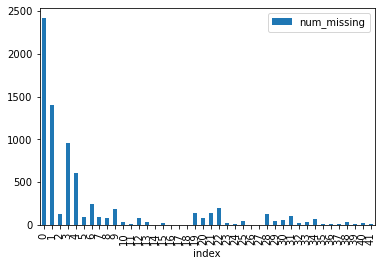

In [68]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


# What to do

### Drop the Observations

For example, from the missing data histogram, we notice that only a minimal amount of observations have over 35 features missing altogether. We may create a new dataset df_less_missing_rows deleting observations with over 35 missing features.


In [69]:
# drop row with missing values
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [70]:
df_less_missing_rows

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,False,False,False,False,False,False,False,False,False,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,False,False,False,False,False,False,False,False,False,23
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,False,False,False,False,False,False,False,False,False,0
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,False,False,False,False,False,False,False,False,False,19
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,False,False,False,False,False,False,False,False,False,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,False,False,False,False,False,False,False,False,False,0
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,False,False,False,False,False,False,False,False,False,22
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,False,False,False,False,False,False,False,False,False,0
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,False,False,False,False,False,False,False,False,False,1


### Drop Features

In [72]:
# hospital_beds_raion has missing values, to drop it

columns_to_drop = ['hospital_beds_raion']
df_no_hos_beds = df.drop(columns_to_drop, axis=1)
df_no_hos_beds

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,False,False,False,False,False,False,False,False,False,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,False,False,False,False,False,False,False,False,False,23
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,False,False,False,False,False,False,False,False,False,0
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,False,False,False,False,False,False,False,False,False,19
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,False,False,False,False,False,False,False,False,False,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,False,False,False,False,False,False,False,False,False,0
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,False,False,False,False,False,False,False,False,False,22
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,False,False,False,False,False,False,False,False,False,0
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,False,False,False,False,False,False,False,False,False,1


### Impute missing values

In [76]:
# replace missing with med

med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.4


### Fill missing

In [78]:
# categorical

df['sub_area'] = df['sub_area'].fillna('__MISSING')

# numerical

df['life_sq'] = df['life_sq'].fillna(999)

# Finding Outliers

### Using Hist/Box plot

<AxesSubplot:>

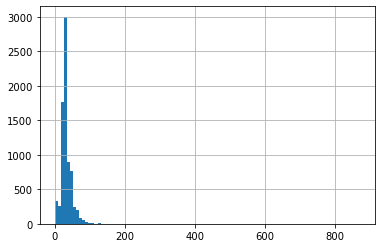

In [80]:
df['life_sq'].hist(bins=100)

<AxesSubplot:>

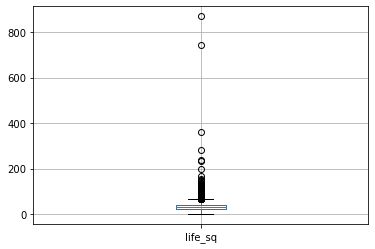

In [83]:
df.boxplot(column=['life_sq'])

### Descriptive statistics

In [85]:
df['life_sq'].describe()

count    7662.000000
mean       32.313156
std        20.935861
min         0.000000
25%        20.800000
50%        30.400000
75%        38.600000
max       869.000000
Name: life_sq, dtype: float64

### Bar chart

<AxesSubplot:>

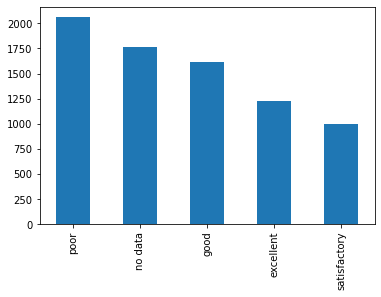

In [87]:
df['ecology'].value_counts().plot.bar()

# Invalid values

In [91]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(7662, 340)
(7662, 339)
